<a href="https://colab.research.google.com/github/Matinsalami/DataScience/blob/main/Hands_on_Machine_Learning/Chapter_6/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Like SVMs, Decision trees are versatile tools used for both Regression and Classification. They are very powerful algorithms which are capable of fitting complex datasets.

Note: Decision Trees are fundamental components of Random Forests, Which are again among the most powerful ML algorithms today.

We split this part into different parts. Train, visualize and predictions with Dicision Trees are differtent subjects discussed in this chapter. Finally we will discuss some of the limitations of this algorithm.

# Training and Visualizing a Dicision Tree

We build a Decision Tree and take a look at how it makes predictions.

In [10]:
# Again we use iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

To visualize the trained Decsion Tree we use `export_graphviz()` method to output a graph definition file called *iris_tree.dot*.

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Then I convert the .dot file into a png file using graphviz package. This is how the first Decision Tree looks like.

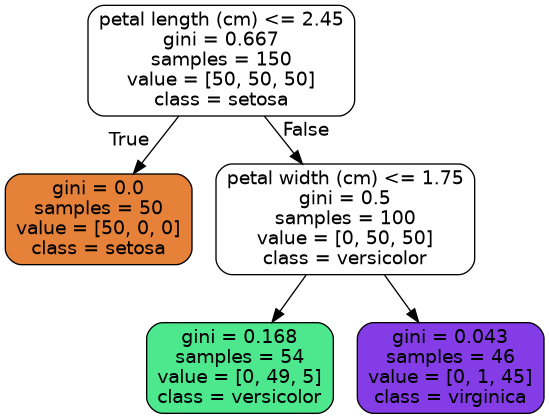

# Making Predictions

Making predictions by looking at the above picture is super easy. Imagine we have an iris flower and want to know its type. First the algorithms ask the first senctence starting from the root node. The algorithms will not stop asking questions until it raches a **leaf node** where there is no question left to be asked. Once reached a leaf node, the class feature of each leaf node indicate the type of iris flower which our desired flower belongs to.

Note: Decision Trees need very small data preparation. There is no need for feature scaling or centring at all.

The `samples` attribute indicates how many samples instances it applies to. For example, 100 samples have petal length bigger than 2.45 and 50 samples have petal length smaller than 2.45.

A node's `value` attribute tells how many traininf instances of each class this node applies to: for example the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor, 45 Iris-Virginica.

Finally a node's `gini` attribute computes its impurity. A node is pure (`gini=0`) if all the training instances it applies to belonges to the same class. Gini impurity is calculated like this:

$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$

$ p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node.

Note: Scikit-Learn uses CART algorithm, which produces only *binary trees*. However with other algorithms such as ID3 we can produce Decision trees with more than 2 children.  

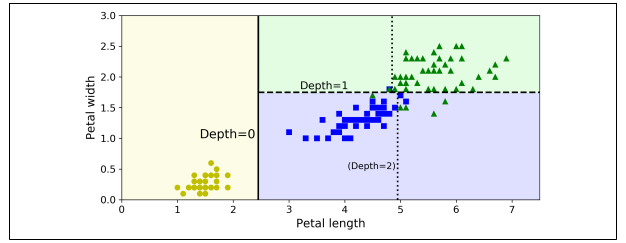

The figure shows the Decision Tree boundaries of the model.

The thick vertical line represents the decision boundary of the root node (depth = 0): petal length = 2.45 cm. Since the left area is pure, it cannot be split any further. However, the right area is impure. So the depth-1 right node splits it at petal width = 1.75 cm. `max_depth` was set to 2, so the Decision Tree stops there. However if we set up the `max_depth` to 3, then the two depth-2 nodes would each add another decision boundary which are represented by dotted lines.  

# Estimating Class probabilities

A Decision tree can also compute the probability that a particular instance fall into a specific class. First the instance traverse the tree and fall into a leaf node. Then by deviding the instances of that specific flower by the number of samples in that leaf we get the probabilities. And of course if we want to predict the class, it should output the class with the highest probability.  

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.predict([[5,1.5]])

array([1])

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# The CART Training algorithm

Scikit-Learn uses the *Classification and Regression Tree* (CART) algorithm to train Decision Trees(also called "growing" trees). The idea is to split the training set into two subsets using a single feature of $k$ and a threshold of $tk$. The way to find this pair is to search for a pair of these two values that produces the purest subsets. The cost function used to minimize is:

$
J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}$
$
\text{where} \quad
\left\{
\begin{array}{ll}
G_{\text{left/right}} & \text{measures the impurity of the left/right subset,} \\
m_{\text{left/right}} & \text{is the number of instances in the left/right subset.}
\end{array}
\right.
\]$


Once it has successfully split the data into two, it splits the subsets with the same logic. It stops when it reaches the `max_depth` hyperparameter, or it cannot find a split that will reduce the impurity. We have other hyperparameters to tweak.

Note: CART is a greedy algorithm. The optimal soulution is known so we should look for a reasonably good solution. Also the optimal tree is an NP-complete problem which make it neccessary to look for a reasonably good solution not an optimal one.